# Practical Exam - Food Claims Process

##### DESCRIÇÃO:

    Exame Prático para a obtenção da Certificação de Data Analyst Associate do Datacamp

        "Vivendo is a fast food chain in Brazil with over 200 outlets.
        Customers often claim compensation from the company for food poisoning.
        The legal team processes these claims. The legal team has offices in four locations.
        The legal team wants to improve how long it takes to reply to customers and close claims.
        The head of the legal department wants a report on how each location differs in the time it
        takes to close claims."

##### VERSIONAMENTO:

    • Python        v3.9.13
    • numpy         v1.24.12
    • pandas        v1.5.3
    • matplotlib    v3.7.8

### 1 - Importando Bibliotecas

In [16]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 1.1 - Caminho do Arquivo:

In [17]:
current_path = os.getcwd()  # Variável que armazena o caminho atual do arquivo
print("CAMINHO DO ARQUIVO: " + current_path)

CAMINHO DO ARQUIVO: c:\Users\Jonnathan\Jupyter notebook\Cursos\Data Analyst Associate - Datacamp


### 2 - Importando o Arquivo

In [18]:
pasta_arquivo_base      = 'base'                    # pasta em relação ao caminho relativo da pasta de arquivos
nome_arquivo            = 'food_claims_2212.csv'    # nome do arquivo
pasta_arquivo_imagens   = 'images'                  # pasta em relação ao caminho relativo da pasta de imagens

path_database = os.path.join(current_path, pasta_arquivo_base, nome_arquivo) # Variável que Caminho do arquivo base

df_base = pd.read_csv(path_database)    # Leitura o arquivo csv
columns = df_base.columns               # Guarda as colunas em uma variável
df_base                                 # Mostra o arquivo

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


##### 2.1 - Tipo de dados para cada coluna:

In [19]:
df_base.dtypes    

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

##### 2.2 - Missing Values para cada coluna:

In [20]:
# Verificando a quantidade de valores nulos por coluna

missing_value = lambda df: df.apply(lambda x: x.isna().sum(), axis=0) # Função que recebe um pd.dataframe e retorna o número de missing values
print('Quantidade de Valores Nulos por Coluna: ')
missing_value(df_base)

Quantidade de Valores Nulos por Coluna: 


claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

### 3 - Processamento de Dados

##### 3.1 - Retirando o 'R$' da coluna claim_amount

In [21]:
regex_number = r"(?:\d|\.|N|A)+" # Código regex para retirar o símbolo de moeda
df_base['claim_amount'] = df_base['claim_amount'].map(lambda row: float(re.findall(regex_number, row)[0])) # Retirando o 'R$' e transformando em numérico
df_base['claim_amount']

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

##### 3.2 - Calculando as médias das colunas numéricas:
        • time_to_close
        • claim_amount
        • amount_paid

In [22]:
MEDIAN_time_to_close = df_base['time_to_close'].median()            # Cálculo da mediana de time to close
MEDIAN_claim_amount  = round(df_base['claim_amount'].median(), 2)   # Cálculo da mediana de claim amount
MEDIAN_amount_paid   = round(df_base['amount_paid'].median(), 2)    # Cálculo da mediana de amount paid

print('MEDIANA time_to_close: ' + str(MEDIAN_time_to_close))        
print('MEDIANA claim_amount:  ' + str(MEDIAN_claim_amount))
print('MEDIANA amount_paid:   ' + str(MEDIAN_amount_paid))

MEDIANA time_to_close: 179.0
MEDIANA claim_amount:  24821.08
MEDIANA amount_paid:   20105.7


##### 3.3 - Realizando o Pré-Processamento do arquivo

        • time_to_close:        Replace missing values with the overall median time to close.
        • claim_amount:         Replace missing values with the overall median claim amount.
        • amount_paid:          Replace missing values with the overall median amount paid.
        • location:             Remove missing values.
        • individuals_on_claim: Replace missing value with 0.
        • linked_cases:         Replace missing values with FALSE.
        • cause:                Replace missing values with ‘unknown’.

In [23]:
isna_replace = lambda elem, subs: subs if pd.isnull(elem) else elem # Função que recebe elem e subs, e troca elem por subs caso elem seja pd.isnull

df_base['time_to_close'] = df_base['time_to_close'].map(lambda x: isna_replace(x, MEDIAN_time_to_close)) # time_to_close: Substitui missing values pela median   
df_base['claim_amount']  = df_base['claim_amount'].map( lambda x: isna_replace(x, MEDIAN_claim_amount))  # claim_amount: Substitui missing values pela mediana
df_base['amount_paid']   = df_base['amount_paid'].map(  lambda x: isna_replace(x, MEDIAN_amount_paid))   # amount_paid: Substitui missing values pela mediana

df_base.drop(df_base.query('location.isna()').index)    # Remove linhas em que o location é nulo

df_base['individuals_on_claim']     = df_base['individuals_on_claim'].map(  lambda x: isna_replace(x, 0)) # individuals_on_claim: Subistitui null por 0
df_base['linked_cases']             = df_base['linked_cases'].map(  lambda x: isna_replace(x, False))     # linked_cases: Substitui missing values por False
df_base['cause']                    = df_base['cause'].map(  lambda x: isna_replace(x, 'unknown'))        # cause: Substitui missing values por 'unknown'

print('Quantidade de Valores Nulos por Coluna: ')
missing_value(df_base)


Quantidade de Valores Nulos por Coluna: 


claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [24]:
df_base

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.30,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat


### 4 - Gráficos

##### 4.1.1 - Barplot: Number of claims in each location

In [25]:
S_location               = pd.Series(df_base['location'].unique()).sort_values()                             # Série dos valores únicos de Location
S_count_location         = S_location.map(lambda x: df_base.query('location == "{}"'.format(x)).count()[0])  # Série da contagem de claims de cada Location

df_claims_by_location = pd.DataFrame(S_count_location.T).T  # Dataframe da contagem de claims como linha
df_claims_by_location.columns = S_location                  # Adicionando Location como coluna
df_claims_by_location

,FORTALEZA,NATAL,RECIFE,SAO LUIS
0,311,287,885,517


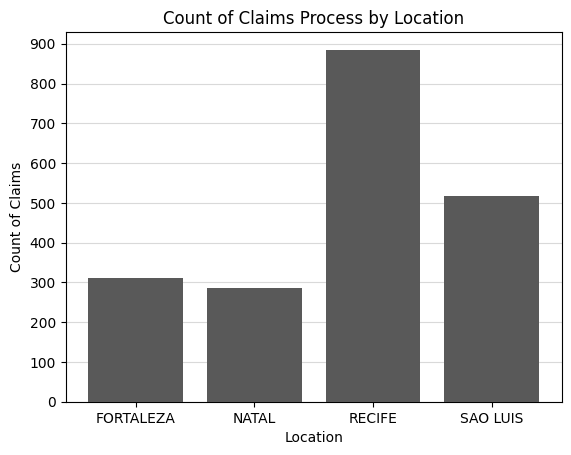

In [26]:
nome_Barplot = '1_barplot_claims_by_location.jpeg'                  # Nome da imagem do barplot

fig, ax = plt.subplots(1, 1)

ax.grid(axis='y', color='#d9d9d9', zorder=0)                        # Adicionando a grade
ax.set_yticks((range(0,S_count_location.max()+100,100)))            # Alterando as marcações no eixo y
ax.bar(S_location, S_count_location, color='#595959', zorder=3)     # Adicionando o gráfico de barras

ax.set_title('Count of Claims Process by Location')                 # Adicionando título
ax.set_xlabel('Location')                                           # Adicionando texto no eixo x
ax.set_ylabel('Count of Claims')                                    # Adicionando texto no eixo y

path_savefig = os.path.join(os.getcwd(), pasta_arquivo_imagens, nome_Barplot)   # Caminho da imagem
fig.savefig(path_savefig)                                                       # Salvando a imagem

##### 4.1.2 - Barplot: Number of claims in each location - RELATIVE

,location,Count of Claim %,Percentage of Claim %
1,FORTALEZA,311,15.55
3,NATAL,287,14.35
0,RECIFE,885,44.25
2,SAO LUIS,517,25.85


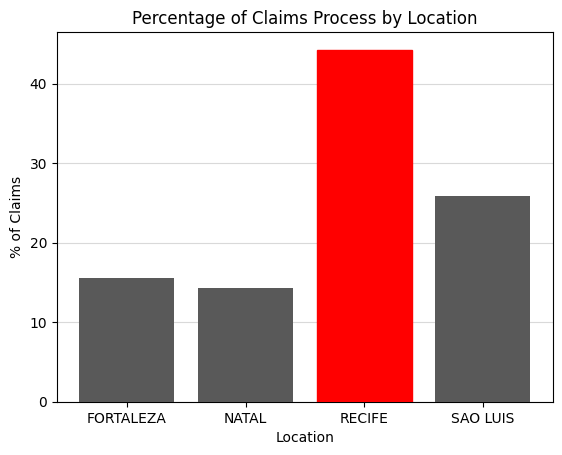

In [27]:
nome_Barplot                = '1_barplot_claims_by_location_relative.jpeg'                  # Nome da imagem do barplot
max_claim                   = df_base.shape[0]
S_count_location_relative   = S_count_location/max_claim*100
fig, ax = plt.subplots(1, 1)

ax.grid(axis='y', color='#d9d9d9', zorder=0)                                                # Adicionando a grade
ax.set_yticks(np.arange(0,int(S_count_location_relative.max()+0.1)*100,0.1*100))            # Alterando as marcações no eixo y

bar = ax.bar(S_location, S_count_location_relative, color='#595959', zorder=3)     # Adicionando o gráfico de barras

ax.set_title('Percentage of Claims Process by Location')               # Adicionando título
ax.set_xlabel('Location')                                              # Adicionando texto no eixo x
ax.set_ylabel('% of Claims')                                           # Adicionando texto no eixo y

bar[2].set_color('red')                                                # Definindo a cor da barra de Recife em vermelho

path_savefig = os.path.join(os.getcwd(), pasta_arquivo_imagens, nome_Barplot)   # Caminho da imagem
fig.savefig(path_savefig)                                                       # Salvando a imagem

df_location_claim_relative          = pd.DataFrame([S_location, S_count_location, S_count_location_relative]).T
df_location_claim_relative.columns  = ['location', 'Count of Claim %','Percentage of Claim %']
df_location_claim_relative

##### 4.2 - Histogram: Distribution of time_to_close for all claims

Desvio Padrão:  49.16
Média:         185.57


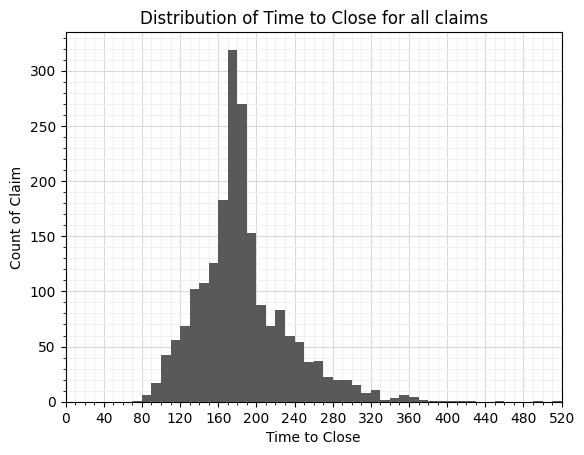

In [28]:
nome_Histogram = '2_Histogram_claims_by_time_to_close.jpeg'                  # Nome da imagem do barplot

interval_xticks = 40                                    # Intervalo de cada marcador principal do gráfico no eixo x
interval_yticks = 50                                    # Intervalo de cada marcador principal do gráfico no eixo y
interval_bin    = 10                                    # Intervalo para o cálculo de frequência do histograma
min_bin         = 0                                     # Valor mínimo no eixo x
max_bin         = df_base['time_to_close'].max()        # Valor máximo no eixo x

bin = np.arange(min_bin, max_bin+interval_bin, interval_bin)    # Array contendo o vetor de marcadores do histograma do eixo x

fig, ax = plt.subplots(1, 1)

ax.grid(color='#d9d9d9', which='major', zorder=0)                                   # Grade principal do gráfico
ax.grid(color='#f0f0f0', which='minor', zorder=0)                                   # Grade secundária do gráfico
ax.set_xlim((bin.min(),bin.max()))                                                  # Limites no eixo x
ax.set_xticks(np.arange(min_bin, max_bin+interval_xticks, interval_xticks))         # Adiciona os marcadores do eixo principal no eixo x
ax.set_xticks(np.arange(min_bin, max_bin+interval_bin, interval_bin), minor=True)   # Adiciona a grade do eixo secundário no eixo x

ax.set_yticks(np.arange(0, df_base['time_to_close'].max()+interval_yticks, interval_yticks))        # Adiciona os marcadores do eixo principal no eixo y
ax.set_yticks(np.arange(0, df_base['time_to_close'].max()+interval_bin, interval_bin), minor=True)  # Adiciona a grade do eixo secundário no eixo y

ax.hist(df_base['time_to_close'], bins = bin, color="#595959", zorder=3)    # Adicionando o histograma        
ax.set_title('Distribution of Time to Close for all claims')                # Adicionando o título
ax.set_xlabel('Time to Close')                                              # Adicionando o label no eixo x
ax.set_ylabel('Count of Claim')                                             # Adicionando o label no eixo y

path_savefig = os.path.join(os.getcwd(), pasta_arquivo_imagens, nome_Histogram)   # Caminho da imagem
fig.savefig(path_savefig)                                                         # Salvando a imagem

print('Desvio Padrão:  ' + str(round(df_base['time_to_close'].std(), 2)))
print('Média:         ' + str(round(df_base['time_to_close'].mean(), 2)))

##### 4.3 - BoxPlot: Relationship between time to close and location

,Median - Time to Close,Standard Deviation - Time to Close
location,,
FORTALEZA,180.0,47.58
NATAL,179.0,47.06
RECIFE,178.0,48.01
SAO LUIS,179.0,53.13


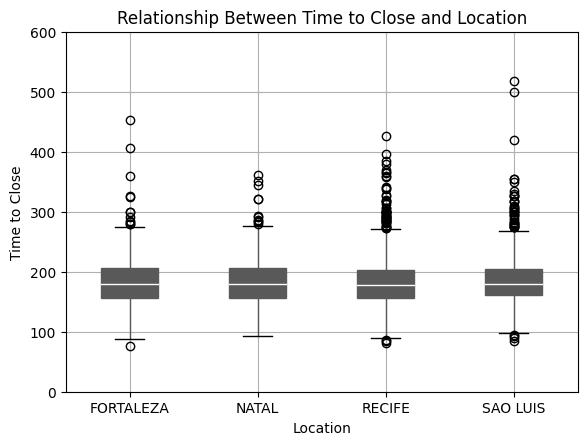

In [29]:
nome_Boxplot = '3_Histogram_time_to_close_by_location.jpeg'     # Nome da imagem do boxplot

ymin_value = 0                                                  # Limite mínimo do eixo y
ymax_value = int(df_base['time_to_close'].max()/100)*100 + 100  # Limite máximo do eixo y

fig, ax = plt.subplots(1, 1)

bp = df_base.boxplot(                                           # Desenvolvimento do boxplot de time_to_close por location
    ax              = ax,
    by              = 'location',
    column          = 'time_to_close',
    patch_artist    =  True,
    color           =  dict(boxes = '#595959', whiskers = '#595959', medians = 'white'),
    
)

fig.suptitle('')                                                            # Retirando o subtitulo que vem por padrão no boxplot do dataframe
ax.set_ylim((ymin_value, ymax_value))                                       # Limites no eixo x
bp.set_title('Relationship Between Time to Close and Location')             # Adicionando o título
ax.set_xlabel('Location')                                                   # Adicionando o label no eixo x
ax.set_ylabel('Time to Close')                                              # Adicionando o label no eixo y

path_savefig = os.path.join(os.getcwd(), pasta_arquivo_imagens, nome_Boxplot)   # Caminho da imagem
fig.savefig(path_savefig)                                                       # Salvando a imagem

s_timeToClose_byLocation_median = round(df_base.groupby('location').median(numeric_only=True)['time_to_close'], 2)  # Mediana do Time_to_close por location
s_timeToClose_byLocation_std    = round(df_base.groupby('location').std(numeric_only=True)['time_to_close'], 2)     # Std dev do Time_to_close por location

df_timeToClose_byLocation = pd.DataFrame([s_timeToClose_byLocation_median, s_timeToClose_byLocation_std]).T
df_timeToClose_byLocation.columns = ['Median - Time to Close', 'Standard Deviation - Time to Close']
df_timeToClose_byLocation

##### 4.4 - BoxPlot: Relationship between time to close and location (No outliers)

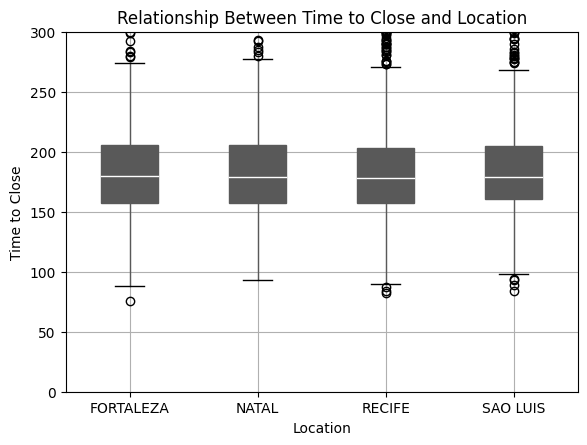

In [30]:
nome_Boxplot = '4_Histogram_time_to_close_by_location_ampliada.jpeg'     # Nome da imagem do boxplot

ymin_value = 0                                                  # Limite mínimo do eixo y
ymax_value = 300  # Limite máximo do eixo y

fig, ax = plt.subplots(1, 1)

bp = df_base.boxplot(                                           # Desenvolvimento do boxplot de time_to_close por location
    ax              = ax,
    by              = 'location',
    column          = 'time_to_close',
    patch_artist    =  True,
    color           =  dict(boxes = '#595959', whiskers = '#595959', medians = 'white'),
    
)

fig.suptitle('')                                                            # Retirando o subtitulo que vem por padrão no boxplot do dataframe
ax.set_ylim((ymin_value, ymax_value))                                       # Limites no eixo x
bp.set_title('Relationship Between Time to Close and Location')             # Adicionando o título
ax.set_xlabel('Location')                                                   # Adicionando o label no eixo x
ax.set_ylabel('Time to Close')                                              # Adicionando o label no eixo y

path_savefig = os.path.join(os.getcwd(), pasta_arquivo_imagens, nome_Boxplot)     # Caminho da imagem
fig.savefig(path_savefig)                                                         # Salvando a imagem